
## Diabetes Risk: Predicting Outcomes in Homogeneous Populations

<img src="https://images.squarespace-cdn.com/content/v1/5a21a88bcd39c3ec782756ed/1519148471554-P8KM1H55H4ZXM3QWC2EJ/Diabetes12.jpg?format=2500w" width=500>

---

This notebook will use Logistic Regression to attempt to predict diabetes from recorded health data in the Pima population in AZ.  The data is available [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity) and a description of a long term diabetes study involving this population can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/).

---

---

### **Part 1: Loading and Parsing the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
pima_diabities_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
pima_diabities_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# all the columns present in the dataset

pima_diab_cols = pima_diabities_data.columns
print(pima_diab_cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
pima_diabities_data['Age'].min()

21


This dataset contains medical data from Pima Indian women aged above 21 years old, living near to the Gila River in Arizona. There are 768 records, without any null values in any of the column.

# the columns in the dataset are:

**'Pregnancies':** As this dataset is sampled from a large dataset, this contains only data related to the women. So, this column contains number of times, a woman got pregnent.

**'Glucose':** Plasma Glucose Concentration over 2 hours in an oral glucose tolerance test(OGTT) (measured in  milligrams per deciliter(mg/dL)). This is a measure of glucose(sugar) in the blood, it is measured 2 hours after consuming a sugary drink.

**'BloodPressure':** Diastolic Blood Pressure(mm Hg)

**'SkinThickness':**  the thickness of the skinfold (mm) at the triceps region of the body.

**'Insulin':** the amount of insulin in the blood (mu U/ml) measured 2 hours after consuming a sugary drink.

**'BMI': ** a measure of body fat based on height and weight. The unit is kg/m^2.


**'DiabetesPedigreeFunction':**a measure of the hereditary risk(diabetes history in relatives and the genetic relationship of those relatives to the individual). The higher the value, there is more chance of a person developing diabities.

**'Age':** the age of the individual in years

**'Outcome':** 0 or 1 values, indicating whether the individual has diabettes or not. 1 signifies person has diabities, 0 signifies does not have diabities.

In [ ]:
# we can see that there are no null values present.
pima_diabities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
""" plot histograms to analyze distribution of each of the columns in
  pima_diabities_data dataframe """

#  the x axis labels for each column, with units
all_column_x_labels = ['pregnancies(no. of times)', 'plasma glucose' \
                        'concentration((mg/dL)', 'Blood Pressure(mmHg)',
                       'SkinThickness(mm)', 'Insulin(mIU mL)',
                       'BMI(kg/square(m)',
                       'DiabetesPedigreeFunction(genetic diabities risk)',
                       'Age(Years)',
                       'outcome(0=does not, 1=does)']


def plot_pima_diabities_data(cols_histogram=False, cols_qqplot=False):
    """ plot the histogram or qq plot for the pima_diabities_data """


    # initialize the 3x3 panel plot with 15 inches wide and 10 inches tall, it
    # returns the 'fig', to store the figure object and 'ax' variable stores
    # numpy array of AxesSubplot objects, which are the individual subplots in the panel plot
    fig, ax = plt.subplots(3, 3, figsize=(15, 10))

    for column_num in range(len(pima_diab_cols)):
        # for each column, we will access the three subplots in the column
        # // gives int division, % gives the reminder
        curr_ax_obj = ax[column_num // 3, column_num % 3]

        # for plotting the histogram
        if cols_histogram == True:
            curr_ax_obj.hist(pima_diabities_data.iloc[:, column_num])

        # for plotting the histogram, to find out the outliers, if any
        if cols_qqplot == True:
            curr_ax_obj.boxplot(pima_diabities_data.iloc[:, column_num])

        curr_ax_obj.set_title(pima_diab_cols[column_num], fontsize=10)

        # give labels to a and y axis of each axes objects(sub plot)
        curr_ax_obj.set_xlabel("{}".format(all_column_x_labels[column_num]))

        curr_ax_obj.set_ylabel("frequency")

    # give horizantal and vertical space for the subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

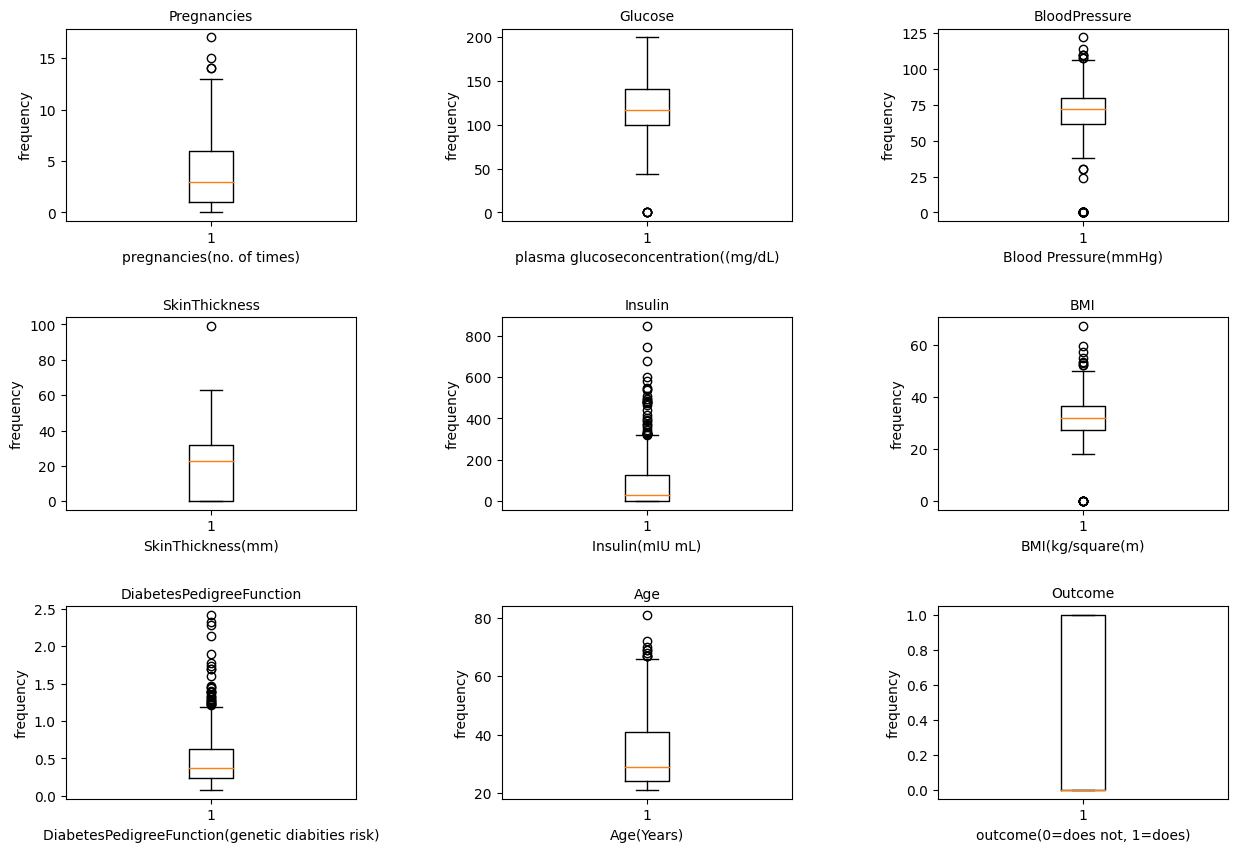

In [ ]:
# outliers test:
plot_pima_diabities_data(cols_qqplot=True)

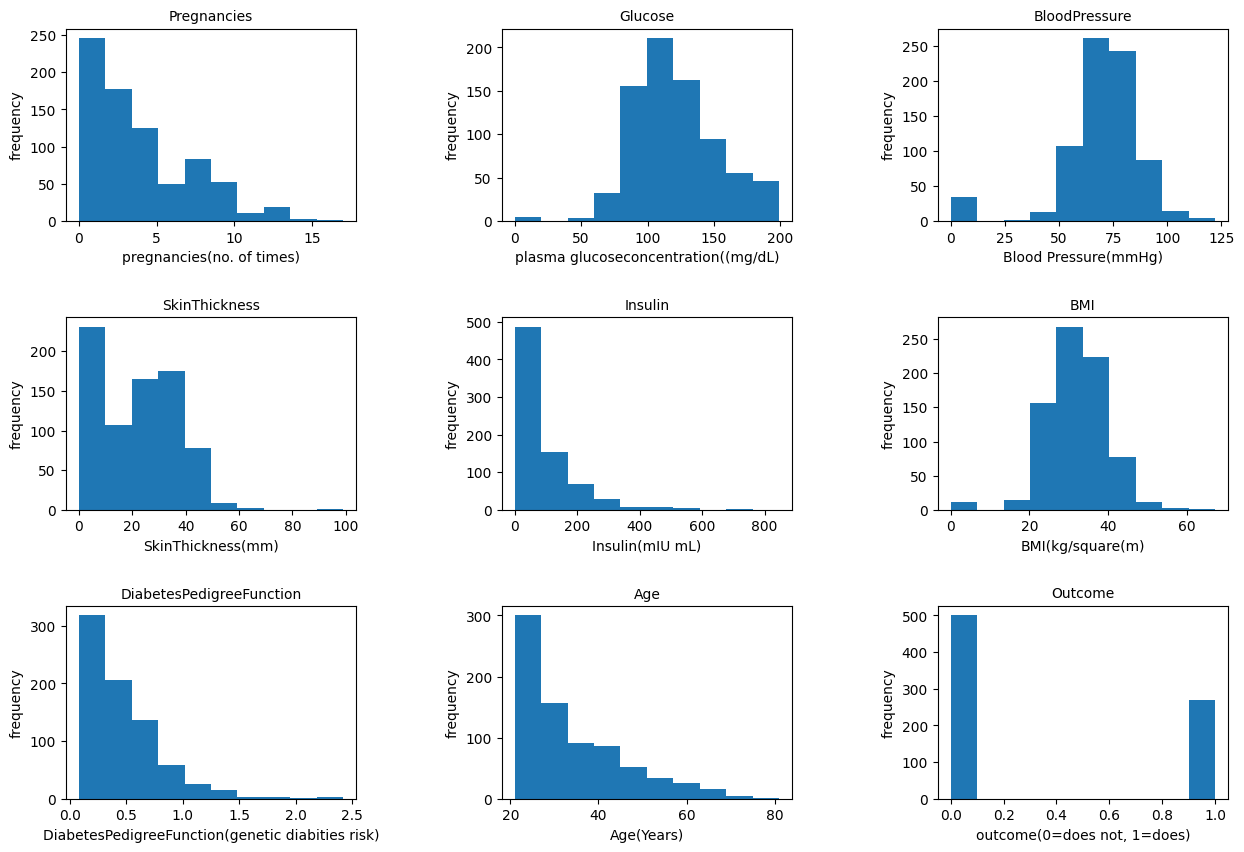

In [ ]:
plot_pima_diabities_data(cols_histogram=True)

In [ ]:
pima_diabities_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**what information you can infer from each histogram in this plot.**

Pregnancies : The women with zero Pregnancies are more, and the majority of the women had less than 5 pregnancies and are very few women with pregnancies more than 10.

Glucose: Majority of the women has Glucose levels in the range of 100 to 150 mg/dL. we can also observe that there are some women whose Glucose levels are very i.e less than 70 mg/dL.


BloodPressure: Thhe Distribution of blood pressure falls into Normal Distribution with its mean at 70, and most of the women blood pressure in the range of 60 to 90 mmHg. But there are certain people with very high and low BP, i.e more than 100 and less than 50, which is undesirable.

SkinThickness: The majority of the women has skin thickness in the range of 10 and 40 mm.

Insulin: Most Women contains Insulin less than 200 mIU mL and the distribution is like Pareto distribution as most of the women has Insulin levels below 200 mIU mL and there are less women with insulin levels more than 200 mIU mL.

BMI: The distribution of BMI is like Right skewed Normal Distribution with maority of the women having BMI in the ranges of 25 to 40(kg/square(m)), where as the mean BMI is located near to 35(kg/square(m)).


DiabetesPedigreeFunction: Majority of the women has DiabetesPedigreeFunction,genitics diabities risk values less than one, in that also there are more women with less than 0.5.


Age: Most of the women have ages less than 30, and that too precisely most women have ages around 20 years.

Outcome: There are more zeros's than ones, indicating that majority of the people are not diagnosed with diabities.

In [ ]:
# Remove rows for which the values of any of the columns are not physically possible (e.g., it is not possible to have a BMI of $0$).
bp_gt_0 = pima_diabities_data[pima_diabities_data['BloodPressure'] > 0]['BloodPressure'].min()
bp_gt_0

24

In [ ]:
bp_gt_0.min()

24

In [ ]:
req_pima_diab_cols = pima_diab_cols[1:6]
pima_diab_cols_values_dict = {'column_name':[], 'min_val':[], 'max_val':[]}

for each_col in req_pima_diab_cols:
    pima_diab_cols_values_dict['column_name'].append(each_col)
    pima_diab_cols_values_dict['min_val'].append(pima_diabities_data[pima_diabities_data[each_col] > 0][each_col].min())
    pima_diab_cols_values_dict['max_val'].append(pima_diabities_data[pima_diabities_data[each_col] > 0][each_col].max())

pima_diab_cols_values_df = pd.DataFrame(pima_diab_cols_values_dict)


In [ ]:
print('Pima Indian women minimum and maximum column values')
pima_diab_cols_values_df

Pima Indian women minimum and maximum column values


,column_name,min_val,max_val
0,Glucose,44.0,199.0
1,BloodPressure,24.0,122.0
2,SkinThickness,7.0,99.0
3,Insulin,14.0,846.0
4,BMI,18.2,67.1


we can see in the qq plot that there are some outliers present in the data, we can see the minimum and maximum values in the above table also.

The above values signifies some extreme values present in the dataset for each column. For example **Blood Pressure** less than **40 mmHg**, **skin thickness less than 10 and greater than 50**, **Insulin below 15 mIU/mL or above 600 mIU/mL, and BMI below 15 or above 50 kg/square(m)** is not common at all. But in the give dataset, we can see all of these values. Bt we can understand that there may be patients with these values present in  dataset, It is not possible to further research and to know about each values, why these uncommon values are present. SO, we will remove only values, which are equal to zeros.


In [ ]:
pima_diabities_data[pima_diabities_data['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [ ]:

# drop all the rows of Glucose, Blood Pressure, Skin Thickness, Insuin, BMI values, which cannot be zero
zero_not_possible_cols = list(pima_diab_cols[1:6])

pima_diabities_data = pima_diabities_data.drop(
    pima_diabities_data[(pima_diabities_data[zero_not_possible_cols] == 0).any(axis=1)].index)


In [ ]:
# testing if they are removed or not
pima_diabities_data[pima_diabities_data['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
pima_diabities_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


we can see that the number of rows in the dataset were reduced to about half, becuase of removing all the zero values in the columns, which are not possible.

**Re-plot the 3x3 panel plot of histograms with this new subset of the data.**

In [ ]:
pima_diabities_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

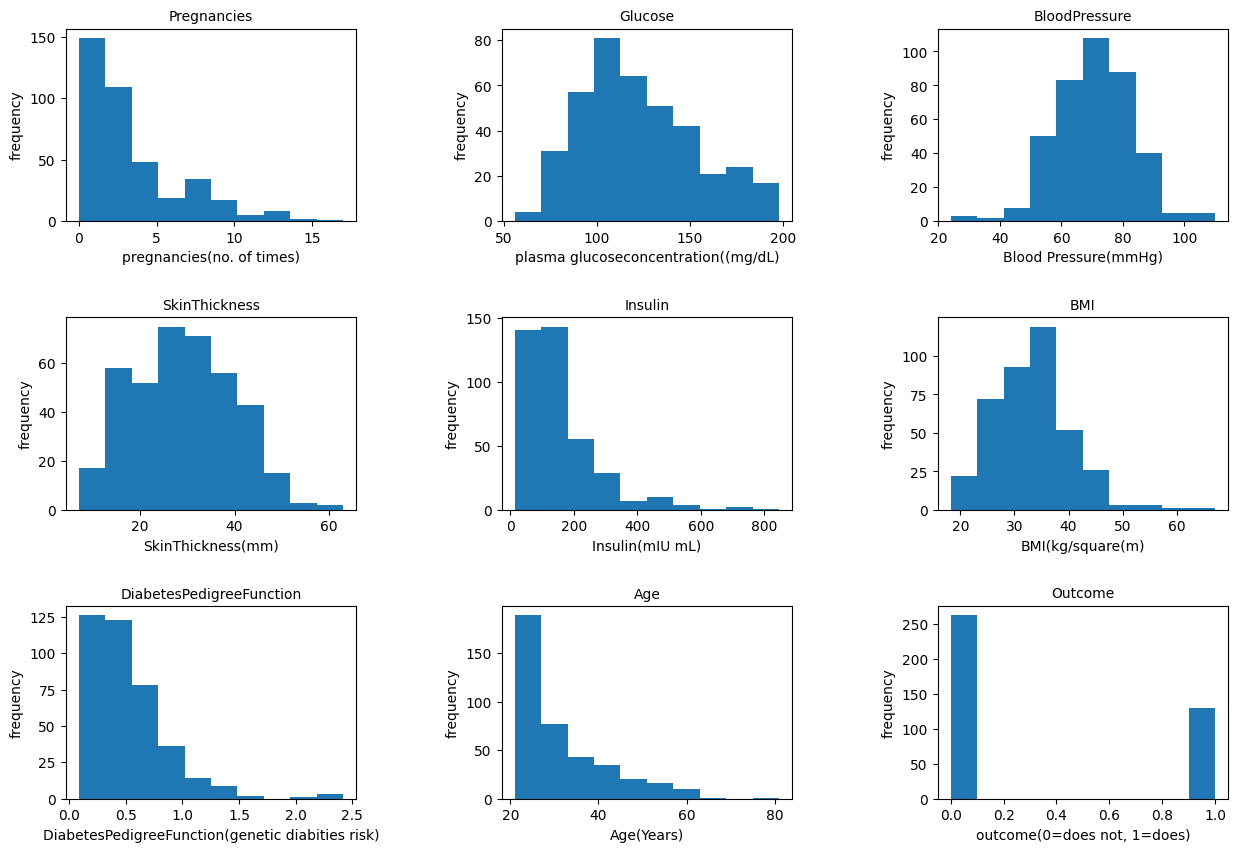

In [ ]:
plot_pima_diabities_data(cols_histogram=True)

we can see that the zero values has been removed for the columns : 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'.

## **Part 2: Fitting a Logistic Regression Model**

First, let's run a logistic regression model on a single feature.

In [ ]:
# Creating features and targets objects from the subset of the data that you
# created above where the features are only blood pressure and the target is the outcome.

pima_diabities_data['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [ ]:
blood_pressure_feat = pima_diabities_data['BloodPressure']
target = pima_diabities_data['Outcome']

In [ ]:
blood_pressure_feat

3      66
4      40
6      50
8      70
13     60
       ..
753    88
755    88
760    58
763    76
765    72
Name: BloodPressure, Length: 392, dtype: int64

In [ ]:
target

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64

**Instantiate and fit a logistic regression model to this feature and target using `sklearn`'s `LogisticRegression`.**

In [ ]:
blood_pressure_model = LogisticRegression()
# Logistic Regression in sklearn expects the input feature data to be a 2D Array,
#  as we have only a single feature(1D Array), we are reshaping it to a 2D Array.
blood_pressure_feat = np.array(blood_pressure_feat).reshape(-1, 1)

blood_pressure_model.fit(blood_pressure_feat, target)

LogisticRegression()

In [ ]:
blood_pressure_model.intercept_

array([-3.16779554])

In [ ]:
blood_pressure_mod_pred = blood_pressure_model.predict(blood_pressure_feat)

In [ ]:
blood_pressure_mod_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<b>

Make a scatter plot of blood pressure vs outcome that contains

- the raw data using black points with an alpha (transparency) value of $0.2$;
- the logistic regression model predictions using blue points that are slightly smaller than the raw data points; and
- the best fit probabilty curve (i.e., the logistic function) from the logistic regression model.

</b>

Text(0.5, 1.0, 'Logistic Regression Model Best Fit Probability Curve')

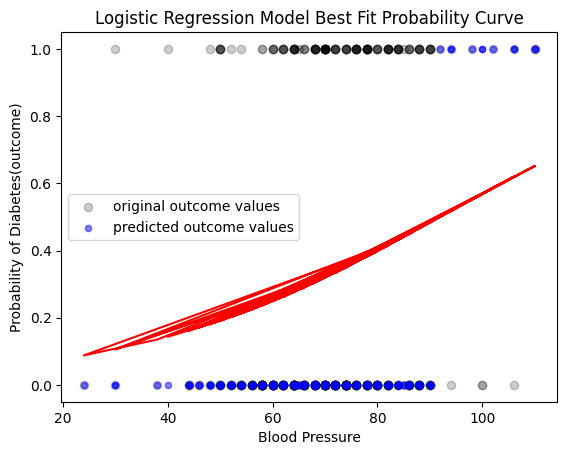

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# clear the plot
plt.clf()

# Define sigmoid function
def sigmoid(blood_pressure_feat, intercept, slope):
    return 1 / (1 + np.exp(-(intercept + slope * blood_pressure_feat)))

intercept = blood_pressure_model.intercept_
slope = blood_pressure_model.coef_

plt.scatter(blood_pressure_feat, target, color='black', alpha=0.2, label='original outcome values')
plt.scatter(blood_pressure_feat, blood_pressure_mod_pred, color='blue', alpha=0.5, s=20, label='predicted outcome values')

# Calculate predicted probability using trained logistic regression model coefficients
y_pred = sigmoid(blood_pressure_feat, intercept, slope)

# Plot the best fit probability curve
plt.plot(blood_pressure_feat, y_pred, color='red')

plt.legend()
# Add axis labels and title
plt.xlabel('Blood Pressure')
plt.ylabel('Probability of Diabetes(outcome)')
plt.title('Logistic Regression Model Best Fit Probability Curve')


Text(0.5, 1.0, 'Logistic Regression Model Best Fit Probability Curve')

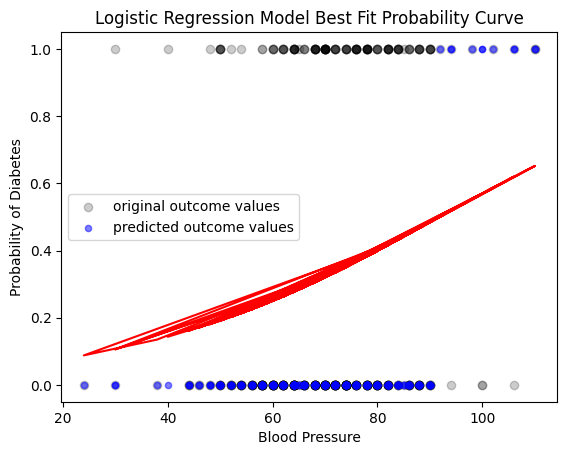

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.clf()


# Define sigmoid function
def sigmoid(blood_pressure_feat, intercept, slope):
    return 1 / (1 + np.exp(-(intercept + slope * blood_pressure_feat)))

intercept = blood_pressure_model.intercept_
slope = blood_pressure_model.coef_

plt.scatter(blood_pressure_feat, target, color='black', alpha=0.2, label='original outcome values')
plt.scatter(blood_pressure_feat, blood_pressure_mod_pred, color='blue', alpha=0.5, s=20, label='predicted outcome values')

# Calculate predicted probability using trained logistic regression model coefficients
y_pred = blood_pressure_model.predict_proba(blood_pressure_feat)[:, 1]

# Plot the best fit probability curve
plt.plot(blood_pressure_feat, y_pred, color='red')

plt.legend()
# Add axis labels and title
plt.xlabel('Blood Pressure')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Model Best Fit Probability Curve')


In [ ]:
pima_diabities_data['BloodPressure']

3      66
4      40
6      50
8      70
13     60
       ..
753    88
755    88
760    58
763    76
765    72
Name: BloodPressure, Length: 392, dtype: int64

In [ ]:
bp_duplicates_cnt = pima_diabities_data['BloodPressure'].duplicated().sum()
print(bp_duplicates_cnt)

355


The above plot contains two data points, The black points represent the Blood Pressure (raw data) values with an alpha value of 0.2, which indicates some level of transparency , whereas the blue values represent the logistic regression model predicted values, which got trainned on Blood Pressure values as training points and the Target(outcome) values as the result values.
we can also observe that the blood pressure values and are slightly smaller than the raw data points. The red curve represents the best fit probability curve (i.e., the logistic function) from the logistic regression model.

The best fit probability curve does not touch either the top one probability values or the zero probability values, and it is present in the middle, wee can clearly see that there is no shape of the sigmoid function('s') in the above plot. It is because of the fact that we have trained our model using only feature Blood Pressure and these values are not enough to predict the target(diabities outcome) perfectly. The Logistic Regression model is not confident to predict wether a data point belongs to one class or the other. Mostly in our case this is due to training on single feature and very few number of data points.

we can also see that there are multiple lines present and the thickness of best probability fit curve is increased because of the reason, there are duplicate values present in the Blood Pressure column. As there are duplicates, the Logistic regression model is Assigning same probaility to those duplicate values.

we can avoid this multiple lines by removing duplicate values.

**Calculate the accuracy of this model by counting the number of target values that were correctly predicted and dividing by the total number of target values.**

In [ ]:
target

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64

In [ ]:
len(blood_pressure_mod_pred)

392

In [ ]:
correct_pred_val_cnt = 0
target_list = list(target)
total_outcome_val_cnt = len(target_list)

for each_target_ind in range(total_outcome_val_cnt):
  if blood_pressure_mod_pred[each_target_ind] == target_list[each_target_ind]:
    correct_pred_val_cnt += 1

bp_model_accuracy = correct_pred_val_cnt/total_outcome_val_cnt
print(bp_model_accuracy)

0.6760204081632653


Now let's fit a model that uses all features.

In [ ]:
all_features_df = pima_diabities_data.iloc[:,:-1]

In [ ]:
pima_diabities_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
all_features_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


**Instantiate and fit a logistic regression model that uses all available features to predict the outcome.**

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(all_features_df, target)

all_feat_pred = log_reg_model.predict(all_features_df)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Calculate the accuracy for this model.**

In [ ]:
correct_pred_val_cnt = 0
target_list = list(target)
total_outcome_val_cnt = len(target_list)

for each_target_ind in range(total_outcome_val_cnt):
  if all_feat_pred[each_target_ind] == target_list[each_target_ind]:
    correct_pred_val_cnt += 1

all_feat_model_accuracy = correct_pred_val_cnt/total_outcome_val_cnt
print(all_feat_model_accuracy)

0.7882653061224489


In [ ]:
pima_diabities_data['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

**which either of the two models that we just fit are "good" models?**

Accuracy is the measure of the correctly predicting the target(label or outcome or dependent) values by the logistic regression model. For both of our models, we got very less accuracy scores, so we can say both are not 'good' models. But the model trained on all features has performed well than the model trained only on Blood Pressure feature.

we can see the model  trained on single feature Blood Pressure has got an Accuracy of 0.6760204081632653 i.e 67 percent, where as the model trained with all of the feature like 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age' git an accuracy of 0.7780612244897959, i.e 77 percent. which means both of the models has got less Accuracies that the ogistic regression model is unable to predict to which class the datapoint belongs in both models.

we can clearly see that Blood Pressure may be an important feature that determines the Diabities, as it solely got 67 percent Accuracy, but it is important to note that there are other features as well in the dataset which are important to predict the outcome of diabities, because of the presence of other important feature, the model with all the feattures accuracy got improved.

The main reasons behind both the models not performing is that the size of the dataset in very less, that made the models not trained properly.
The second reason is that the presence of duplicate values in all the columns of the dataset, because of which, the logistic regression model is unable to train properly as for the same feature value, multiple labels are present. The dataset is imbalanced dataset i.e there are more number of labels approximately double belonging to class 0(diabities is not present) rather than the diabities is present outcome class. Because of which the prediction of the model is biased towrds the diabities not present class, so it also causes the Accuracy to reduce.

Hence, because of the low accuracy measures, both the models trained on Blood Pressure feature and all the features are not the best models, because of the above mentioned reasons. But as the accuracy of the model tarined on all the features is higher than the model predicted on the Blood Pressure, we can say that model tarined on all features is best compared to the blood pressure trained model.